### Imports und Weissemodell

In [2]:
import modelbase
import modelbase.ratelaws as rl
from weisse import WeisseBaseModel, defaultParameters

import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as spo
import seaborn as sns
import pandas as pd

In [3]:
cl = ['si','a','mr','mt','mm','mq', 'cr','ct','cm','cq','pr','pt','pm','pq']

### Weisemodel über Zeit

In [5]:
valuesOneHundredTimeSteps, valuesLastTimeStep = [],[]
m = WeisseBaseModel()
s = modelbase.Simulator(m)
#                        ['si',       'a',     'mr',     'mt',   'mm',    'mq',    'cr', 'ct', 'cm', 'cq', 'pr',   'pt',    'pm',     'pq']
weise_values = np.array([31096.192, 43297.502, 8514.558, 49.333, 49.333, 8811.960, 348.675, 0, 357.898, 0, 0.0414, 471.364, 471.364 , 471.364])
changedValuesOverTimeArray = s.timeCourse(np.linspace(0,3000,100),weise_values);
valuesOneHundredTimeSteps.append(changedValuesOverTimeArray)
valuesLastTimeStep.append(changedValuesOverTimeArray[-1])




### Enzyme und Proteine

In [6]:
werteq, wertem, wertet, werter = [], [], [], []
for i, date in enumerate(valuesOneHundredTimeSteps[0]):
    werteq.append(valuesOneHundredTimeSteps[0][i][13])
    wertem.append(valuesOneHundredTimeSteps[0][i][12])
    wertet.append(valuesOneHundredTimeSteps[0][i][11])
    werter.append(valuesOneHundredTimeSteps[0][i][10])

### Proteine über die Zeit gepoltet

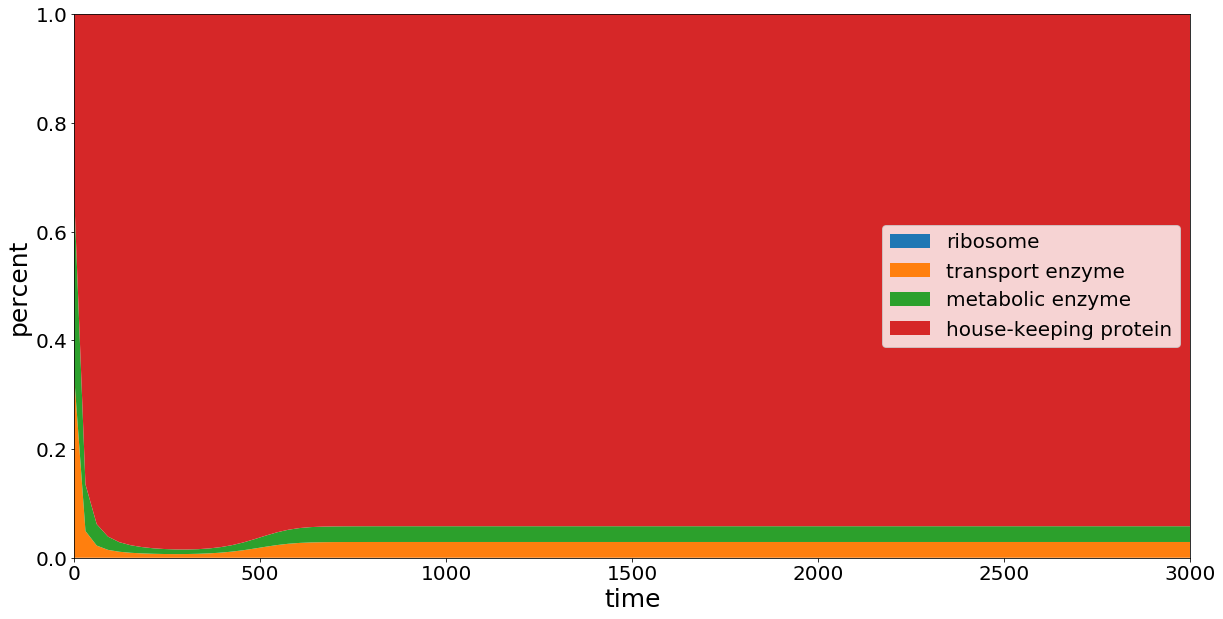

In [7]:
# Make data
data = pd.DataFrame({'group_A':werter, 'group_B':wertet, 'group_C':wertem, 'group_D':werteq}, index=s.getT())
 
# We need to transform the data from raw data to percentage (fraction)
data_perc = data.divide(data.sum(axis=1), axis=0)
 
# Make the plot
plt.figure(figsize=(20,10))
plt.stackplot(s.getT(),  data_perc["group_A"],  data_perc["group_B"],  data_perc["group_C"], data_perc["group_D"], labels=['ribosome', 'transport enzyme', 'metabolic enzyme', 'house-keeping protein'])
plt.legend(loc='center right',prop={'size': 20})
plt.margins(0,0)
#plt.title('prozentuale Verteilung der Proteine und Enzyme', size = 30)
plt.xlabel('time', size = 25)
plt.ylabel('percent', size = 25)
#plt.ylableticks()
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.show()

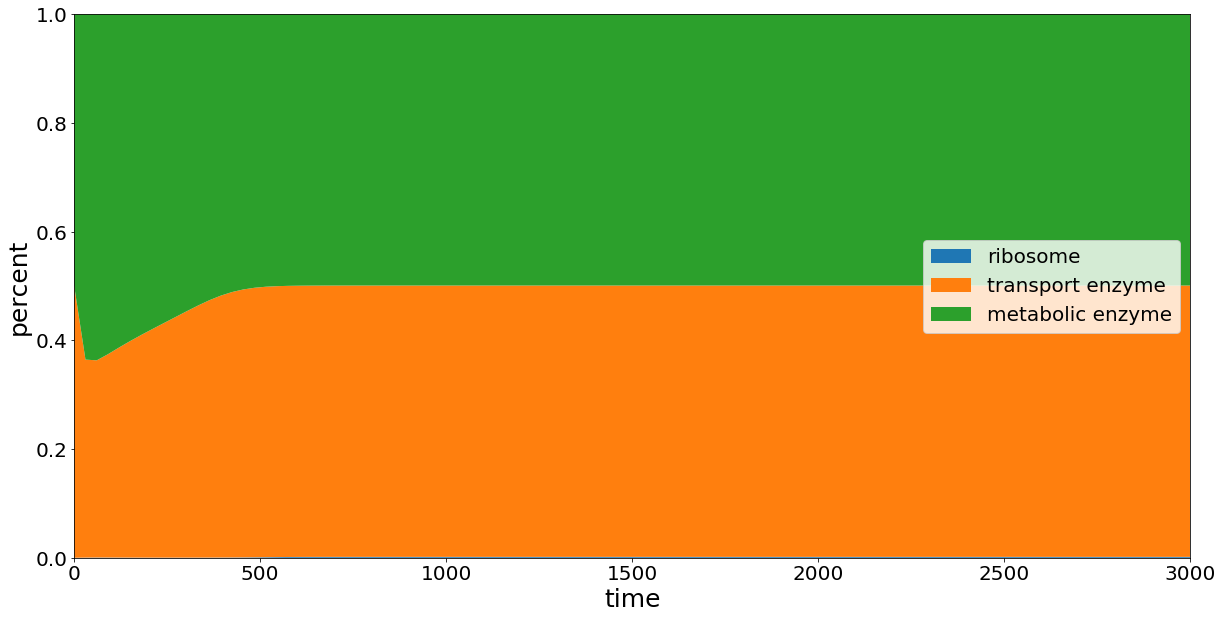

In [8]:
# Make data
data = pd.DataFrame({'group_A':werter, 'group_B':wertet, 'group_C':wertem}, index=s.getT())
 
# We need to transform the data from raw data to percentage (fraction)
data_perc = data.divide(data.sum(axis=1), axis=0)
 
# Make the plot
plt.figure(figsize=(20,10))
plt.stackplot(s.getT(),  data_perc["group_A"],  data_perc["group_B"],  data_perc["group_C"], labels=['ribosome', 'transport enzyme', 'metabolic enzyme', 'house-keeping protein'])
plt.legend(loc='center right',prop={'size': 20})
plt.margins(0,0)
#plt.title('prozentuale Verteilung der Proteine und Enzyme', size = 30)
plt.xlabel('time', size = 25)
plt.ylabel('percent', size = 25)
#plt.ylableticks()
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.show()

### Proteine mit Aminosäuren multipliziert

In [9]:
werteqa, wertema, werteta, wertera = [], [], [], []
for i, date in enumerate(valuesOneHundredTimeSteps[0]):
    werteqa.append(valuesOneHundredTimeSteps[0][i][13]*300)
    wertema.append(valuesOneHundredTimeSteps[0][i][12]*300)
    werteta.append(valuesOneHundredTimeSteps[0][i][11]*300)
    wertera.append(valuesOneHundredTimeSteps[0][i][10]*7459)

### Proteine mit Aminosäuren multipliziert über die Zeit gepoltet

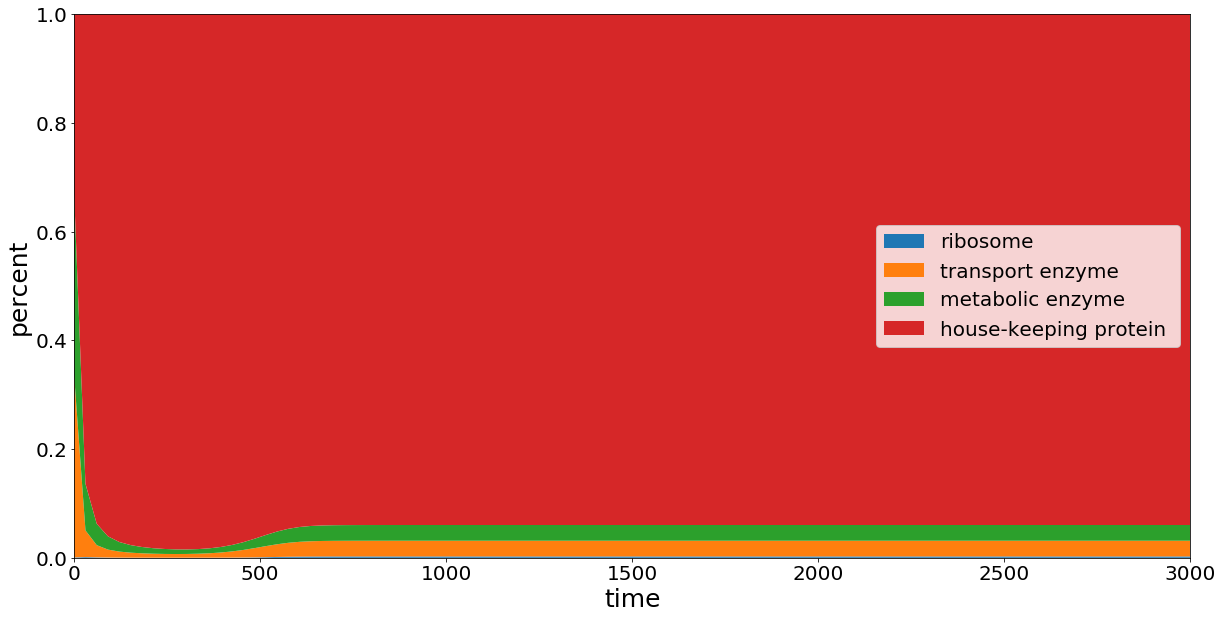

In [10]:
# Make data
data = pd.DataFrame({'group_A':wertera, 'group_B':werteta, 'group_C':wertema, 'group_D':werteqa}, index=s.getT())
 
# We need to transform the data from raw data to percentage (fraction)
data_perc = data.divide(data.sum(axis=1), axis=0)
 
# Make the plot
plt.figure(figsize=(20,10))
plt.stackplot(s.getT(),  data_perc["group_A"],  data_perc["group_B"],  data_perc["group_C"], data_perc["group_D"], labels=['ribosome', 'transport enzyme ', 'metabolic enzyme ', 'house-keeping protein '])
plt.legend(loc='center right',prop={'size': 20})
plt.margins(0,0)
#plt.title('prozentuale Verteilung der Proteine und Enzyme in Aminosäuren', size = 30)
plt.xlabel('time', size = 25)
plt.ylabel('percent', size = 25)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.show()

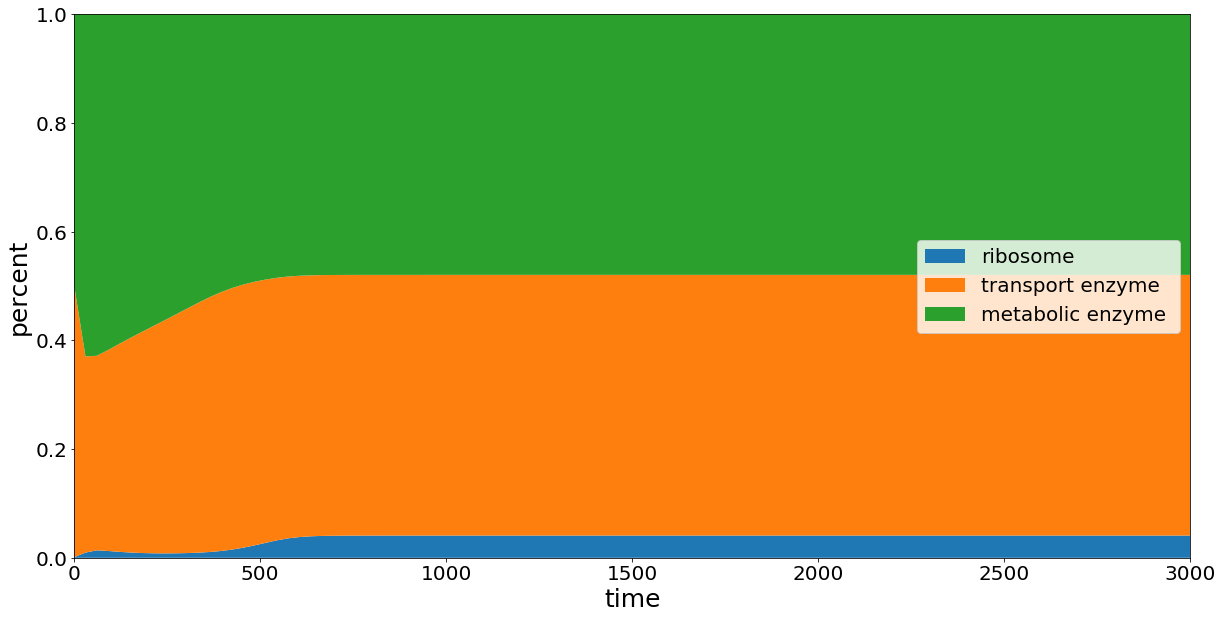

In [11]:
# Make data
data = pd.DataFrame({'group_A':wertera, 'group_B':werteta, 'group_C':wertema}, index=s.getT())
 
# We need to transform the data from raw data to percentage (fraction)
data_perc = data.divide(data.sum(axis=1), axis=0)
 
# Make the plot
plt.figure(figsize=(20,10))
plt.stackplot(s.getT(),  data_perc["group_A"],  data_perc["group_B"],  data_perc["group_C"], labels=['ribosome', 'transport enzyme ', 'metabolic enzyme ', 'house-keeping protein '])
plt.legend(loc='center right',prop={'size': 20})
plt.margins(0,0)
#plt.title('prozentuale Verteilung der Proteine und Enzyme in Aminosäuren', size = 30)
plt.xlabel('time', size = 25)
plt.ylabel('percent', size = 25)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.show()

# Nährstoffimport inhibiert

In [21]:
valuesOneHundredTimeStepsInh, valuesLastTimeStepInh = [],[]
minh = WeisseBaseModel()
#                        ['si',       'a',     'mr',     'mt',   'mm',    'mq',    'cr', 'ct', 'cm', 'cq', 'pr',   'pt',    'pm',     'pq']
weise_values = np.array([31096.192, 43297.502, 8514.558, 49.333, 49.333, 8811.960, 348.675, 0, 357.898, 0, 0.0414, 471.364, 471.364 , 471.364])

minh.par.update({'vt': 10})
sinh = modelbase.Simulator(minh)
changedValuesOverTimeArrayInh = sinh.timeCourse(np.linspace(0,3000,100),weise_values);
valuesOneHundredTimeStepsInh.append(changedValuesOverTimeArrayInh)
valuesLastTimeStepInh.append(changedValuesOverTimeArrayInh[-1])


### Enzyme und Proteine mit jeweiligen Komplexen nach Inhibierung

In [22]:
werteqInh, wertemInh, wertetInh, werterInh = [], [], [], []
for i, date in enumerate(valuesOneHundredTimeStepsInh[0]):
    werteqInh.append(valuesOneHundredTimeStepsInh[0][i][13])
    wertemInh.append(valuesOneHundredTimeStepsInh[0][i][12])
    wertetInh.append(valuesOneHundredTimeStepsInh[0][i][11])
    werterInh.append(valuesOneHundredTimeStepsInh[0][i][10])

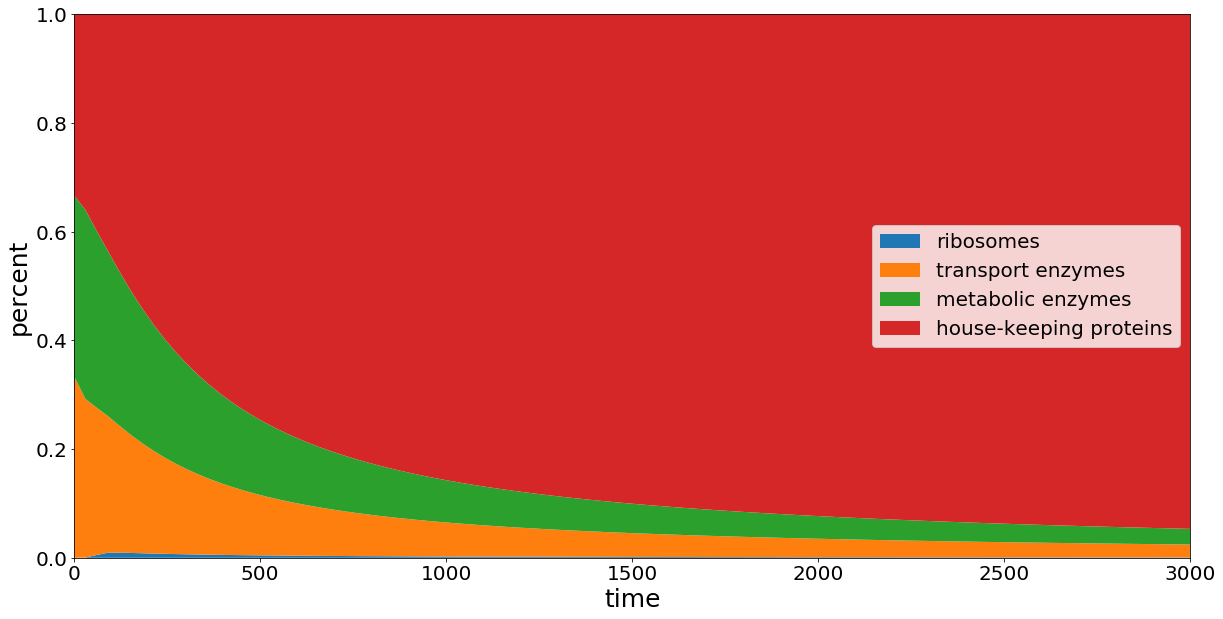

In [23]:
# Make data
data = pd.DataFrame({'group_A':werterInh, 'group_B':wertetInh, 'group_C':wertemInh,'group_D':werteqInh}, index=sinh.getT())
 
# We need to transform the data from raw data to percentage (fraction)
data_perc = data.divide(data.sum(axis=1), axis=0)

# Make the plot
plt.figure(figsize=(20,10))
plt.stackplot(sinh.getT(),  data_perc["group_A"],  data_perc["group_B"],  data_perc["group_C"],data_perc["group_D"], labels=['ribosomes', 'transport enzymes', 'metabolic enzymes', 'house-keeping proteins'])
plt.legend(loc='center right',prop={'size': 20})
plt.margins(0,0)
#plt.title('Percent distribution of proteins and enzymes \n with inhibition of nutrient import', size = 30)
plt.xlabel('time', size = 25)
plt.ylabel('percent', size = 25)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.show()

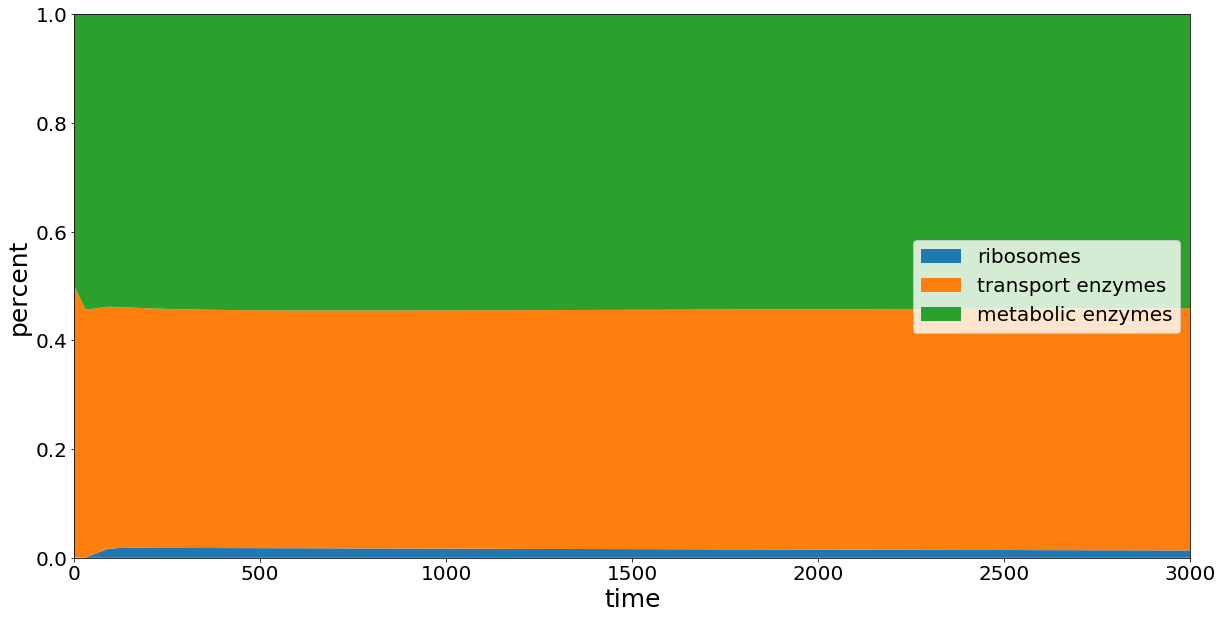

In [24]:
# Make data
data = pd.DataFrame({'group_A':werterInh, 'group_B':wertetInh, 'group_C':wertemInh}, index=s.getT())
 
# We need to transform the data from raw data to percentage (fraction)
data_perc = data.divide(data.sum(axis=1), axis=0)
 
# Make the plot
plt.figure(figsize=(20,10))
plt.stackplot(s.getT(),  data_perc["group_A"],  data_perc["group_B"],  data_perc["group_C"], labels=['ribosomes', 'transport enzymes', 'metabolic enzymes', 'house-keeping proteins'])
plt.legend(loc='center right',prop={'size': 20})
plt.margins(0,0)
#plt.title('Percent distribution of proteins and enzymes \n inhibiting nutrient import into amino acids', size = 30)
plt.xlabel('time', size = 25)
plt.ylabel('percent', size = 25)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.show()

### Proteine nach Inhibierung mit aminosäuren multipliziert

In [25]:
werteqaInh, wertemaInh, wertetaInh, werteraInh = [], [], [], []
for i, date in enumerate(valuesOneHundredTimeStepsInh[0]):
    werteqaInh.append(valuesOneHundredTimeStepsInh[0][i][13]*300)
    wertemaInh.append(valuesOneHundredTimeStepsInh[0][i][12]*300)
    wertetaInh.append(valuesOneHundredTimeStepsInh[0][i][11]*300)
    werteraInh.append(valuesOneHundredTimeStepsInh[0][i][10]*7459)

### Proteine nach Inhibierung mit Aminosäuren multipliziert über die Zeit gepoltet

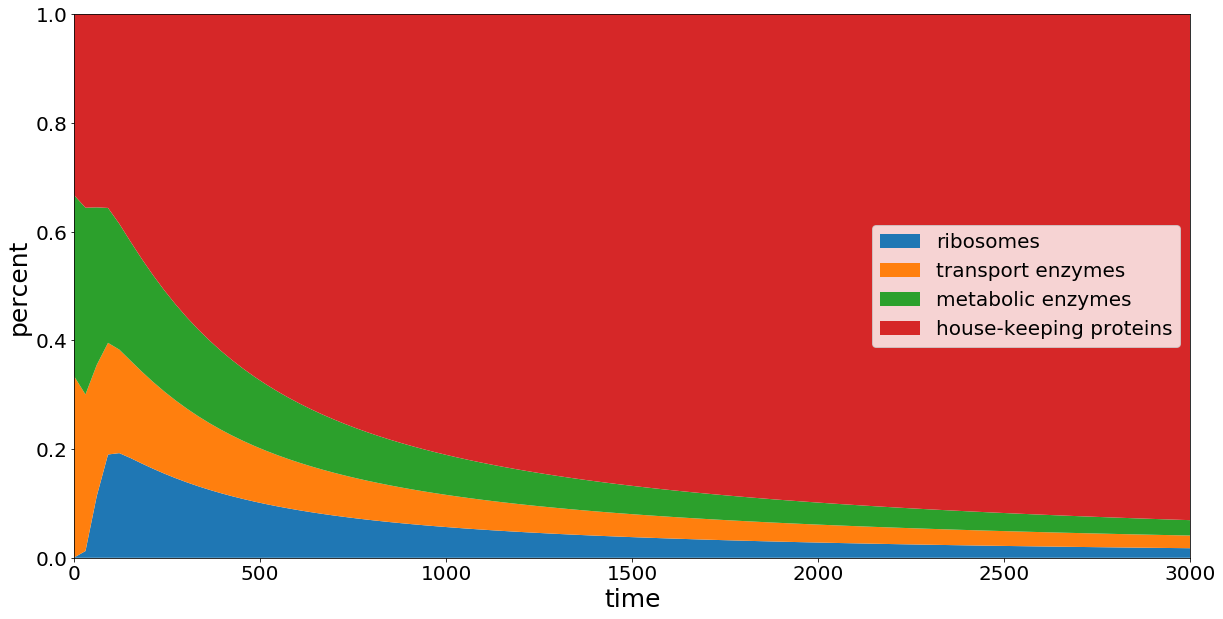

In [28]:
# Make data
data = pd.DataFrame({'group_A':werteraInh, 'group_B':wertetaInh, 'group_C':wertemaInh, 'group_D':werteqaInh}, index=sinh.getT())
 
# We need to transform the data from raw data to percentage (fraction)
data_perc = data.divide(data.sum(axis=1), axis=0)
 
# Make the plot
plt.figure(figsize=(20,10))
plt.stackplot(sinh.getT(),  data_perc["group_A"],  data_perc["group_B"],  data_perc["group_C"],  data_perc["group_D"], labels=['ribosomes', 'transport enzymes', 'metabolic enzymes', 'house-keeping proteins'])
plt.legend(loc='center right',prop={'size': 20})
plt.margins(0,0)
#plt.title('Inhibition of nutrient import without house-keeping proteins', size = 30)
plt.xlabel('time', size = 25)
plt.ylabel('percent', size = 25)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.show()


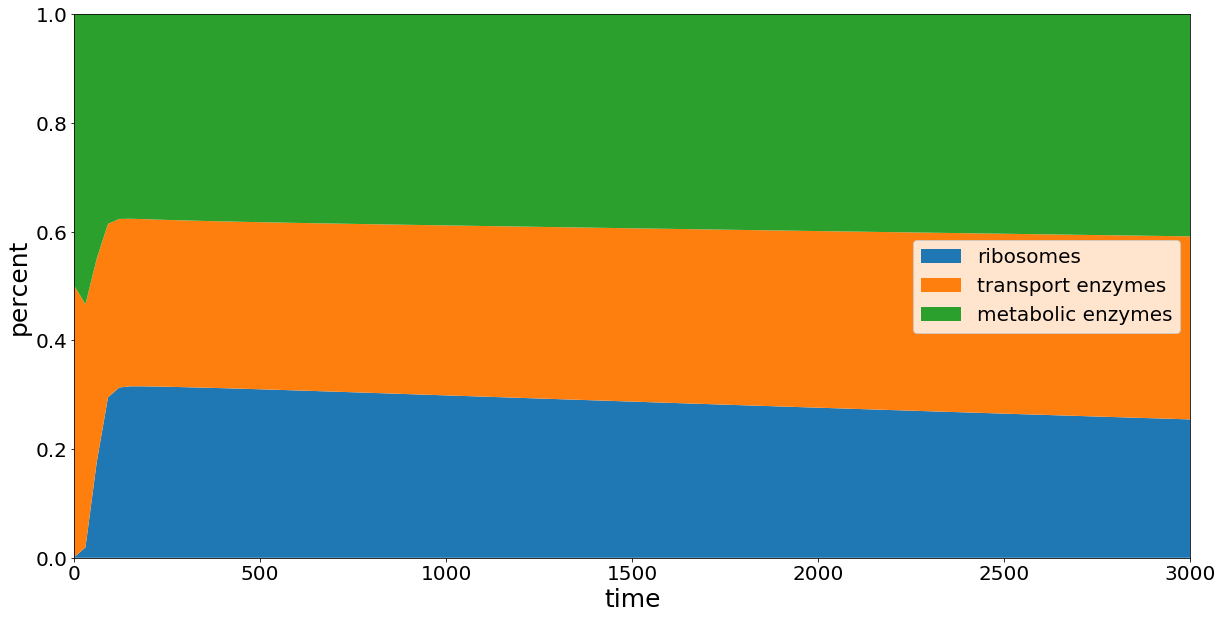

In [29]:
    
# Make data
data = pd.DataFrame({'group_A':werteraInh, 'group_B':wertetaInh, 'group_C':wertemaInh}, index=s.getT())
 
# We need to transform the data from raw data to percentage (fraction)
data_perc = data.divide(data.sum(axis=1), axis=0)
 
# Make the plot
plt.figure(figsize=(20,10))
plt.stackplot(s.getT(),  data_perc["group_A"],  data_perc["group_B"],  data_perc["group_C"], labels=['ribosomes', 'transport enzymes', 'metabolic enzymes', 'house-keeping proteins'])
plt.legend(loc='center right',prop={'size': 20})
plt.margins(0,0)
#plt.title('Percent distribution of proteins and enzymes \n without house-keeping proteins in amino acids', size = 30)
plt.xlabel('time', size = 25)
plt.ylabel('percent', size = 25)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.show()